In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

from AEOCFO.Utility import column_converter
from AEOCFO.Utility import in_df

c:\Users\Jon\anaconda3\envs\OCFO\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading Data

In [6]:
raw = pd.read_csv('experimental_data/FinancialTransactionList.csv', header=2)
ten_year = pd.read_csv('experimental_data/Transac15-25.csv', header=1)

In [4]:
raw.head(5)

,Account Name,Account Description,Transaction Reference #,Date,Reconciled,Created By,Payee/Source First Name,Payee/Source Last Name,Originator Account Name,From Request - Account Name,...,From Request - Payee City,From Request - Payee State,From Request - Payee ZIP,Memo,Category,Type,Transaction Method,Amount,Ending Balance After,Available Balance After
0,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1859011,7/26/2024,No,NaN,Henry Isselbacher,NaN,3-40-201492-00000-ASUCFunds-LCP,NaN,...,NaN,NaN,NaN,Reversal of Year End 23-24 Balance,Internal Transfer,Direct Deposit ACH/Stripe,Payment,"$1,097.34","$7,188,947.99",$0.00
1,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1859012,7/26/2024,No,NaN,Henry Isselbacher,NaN,3-40-200124-00000-ASUCFunds-Abba,NaN,...,NaN,NaN,NaN,Reversal of Year End 23-24 Balance,Internal Transfer,Direct Deposit ACH/Stripe,Payment,$320.00,"$7,188,627.99",$0.00
2,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1859013,7/26/2024,No,NaN,Henry Isselbacher,NaN,3-40-200132-00000-ASUCFunds-A2F,NaN,...,NaN,NaN,NaN,Reversal of Year End 23-24 Balance,Internal Transfer,Direct Deposit ACH/Stripe,Payment,$666.06,"$7,187,961.93",$0.00
3,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1859014,7/26/2024,No,NaN,Henry Isselbacher,NaN,3-40-200136-00000-ASUCFunds-AfgSA,NaN,...,NaN,NaN,NaN,Reversal of Year End 23-24 Balance,Internal Transfer,Direct Deposit ACH/Stripe,Payment,"$3,971.50","$7,183,990.43",$0.00
4,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1859015,7/26/2024,No,NaN,Henry Isselbacher,NaN,3-40-201496-00000-ASUCFunds-LTALS,NaN,...,NaN,NaN,NaN,Reversal of Year End 23-24 Balance,Internal Transfer,Direct Deposit ACH/Stripe,Payment,$361.96,"$7,183,628.47",$0.00


In [9]:
raw.shape

(26409, 26)

In [7]:
ten_year.head(5)

,Account Name,Account Description,Transaction Reference #,Date,Reconciled,Created By,Payee/Source First Name,Payee/Source Last Name,Originator Account Name,From Request - Account Name,...,From Request - Payee City,From Request - Payee State,From Request - Payee ZIP,Memo,Category,Type,Transaction Method,Amount,Ending Balance After,Available Balance After
0,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1688082,8/21/2015,No,NaN,FY 15-16 Budget Allocation,NaN,3-40-202432-00000-ASUCFunds-T4C,NaN,...,NaN,NaN,NaN,FY 15-16 Budget Allocation,X-Adjustment (Admin use only),Direct Deposit ACH/Stripe,Deposit,$1500.00,$5000.00,$1500.00
1,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1688082,8/21/2015,No,NaN,FY 15-16 Budget Allocation,NaN,3-40-202432-00000-ASUCFunds-T4C,NaN,...,NaN,NaN,NaN,FY 15-16 Budget Allocation,X-Adjustment (Admin use only),Direct Deposit ACH/Stripe,Allocation,$1500.00,$6500.00,$0.00
2,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1688085,8/21/2015,No,NaN,FY 14-15 Carry Forward,NaN,3-70-202432-00000-MISC-T4C,NaN,...,NaN,NaN,NaN,FY 14-15 Carry Forward,X-Adjustment (Admin use only),Direct Deposit ACH/Stripe,Deposit,$2402.96,$6500.00,$2402.96
3,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1688085,8/21/2015,No,NaN,FY 14-15 Carry Forward,NaN,3-70-202432-00000-MISC-T4C,NaN,...,NaN,NaN,NaN,FY 14-15 Carry Forward,X-Adjustment (Admin use only),Direct Deposit ACH/Stripe,Allocation,$2402.96,$8902.96,$0.00
4,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1688205,8/21/2015,No,NaN,FY 15-16 Budget Allocation,NaN,3-40-200108-00000-ASUCFunds-100S,NaN,...,NaN,NaN,NaN,FY 15-16 Budget Allocation,X-Adjustment (Admin use only),Direct Deposit ACH/Stripe,Deposit,$600.00,$8902.96,$600.00


In [10]:
ten_year.shape

(195427, 26)

In [14]:
raw.columns

Index(['Account Name', 'Account Description', 'Transaction Reference #',
       'Date', 'Reconciled', 'Created By', 'Payee/Source First Name',
       'Payee/Source Last Name', 'Originator Account Name',
       'From Request - Account Name', 'Request Number',
       'From Request - Subject', 'From Request - Payee First Name',
       'From Request - Payee Last Name', 'From Request - Payee Address1',
       'From Request - Payee Address2', 'From Request - Payee City',
       'From Request - Payee State', 'From Request - Payee ZIP', 'Memo',
       'Category', 'Type', 'Transaction Method', 'Amount',
       'Ending Balance After', 'Available Balance After'],
      dtype='object')

In [8]:
ten_year.columns

Index(['Account Name', 'Account Description', 'Transaction Reference #',
       'Date', 'Reconciled', 'Created By', 'Payee/Source First Name',
       'Payee/Source Last Name', 'Originator Account Name',
       'From Request - Account Name', 'Request Number',
       'From Request - Subject', 'From Request - Payee First Name',
       'From Request - Payee Last Name', 'From Request - Payee Address1',
       'From Request - Payee Address2', 'From Request - Payee City',
       'From Request - Payee State', 'From Request - Payee ZIP', 'Memo',
       'Category', 'Type', 'Transaction Method', 'Amount',
       'Ending Balance After', 'Available Balance After'],
      dtype='object')

# EDA


## Cleaning Our Irrelevant Columns and Making Datatype Conversions

In [17]:
raw.columns

Index(['Account Name', 'Account Description', 'Transaction Reference #',
       'Date', 'Reconciled', 'Created By', 'Payee/Source First Name',
       'Payee/Source Last Name', 'Originator Account Name',
       'From Request - Account Name', 'Request Number',
       'From Request - Subject', 'From Request - Payee First Name',
       'From Request - Payee Last Name', 'From Request - Payee Address1',
       'From Request - Payee Address2', 'From Request - Payee City',
       'From Request - Payee State', 'From Request - Payee ZIP', 'Memo',
       'Category', 'Type', 'Transaction Method', 'Amount',
       'Ending Balance After', 'Available Balance After'],
      dtype='object')

In [48]:
raw.dtypes

Account Name                        object
Account Description                 object
Transaction Reference #              int64
Date                                object
Reconciled                          object
Created By                          object
Payee/Source First Name             object
Payee/Source Last Name              object
Originator Account Name             object
From Request - Account Name         object
Request Number                     float64
From Request - Subject              object
From Request - Payee First Name     object
From Request - Payee Last Name      object
From Request - Payee Address1       object
From Request - Payee Address2       object
From Request - Payee City           object
From Request - Payee State          object
From Request - Payee ZIP            object
Memo                                object
Category                            object
Type                                object
Transaction Method                  object
Amount     

In [69]:
from collections.abc import Iterable

def values_visualizer(df, cols, percentage=True, n=10, dropna=False):
    """
    Displays value counts (or percentages) and bar plots for specified columns in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        cols (list): List of columns to visualize.
        percentage (bool): Whether to display values as percentages of the total.
        n (int): Number of top values to display.
        dropna (bool): Whether to drop NA values in value counts.
    """
    if isinstance(cols, str): cols = [cols]
    assert isinstance(cols, Iterable), f'input must be a string of iterable of strings, currently is type {type(cols)}, output: {cols}' 
    assert in_df(cols, df), f'not all specified columns {cols} exist in inputted df\n{df}'

    for col in cols:
        print(f"\nValue Counts for col '{col}'")
        table = df[col].value_counts(dropna=dropna)
        if table.empty:
            print("  (No data to display)")
            continue
        if percentage:
            table = table / len(df) * 100
            print(table.round(2))
        else:
            print(table)

        x_axis = pd.Series(table.index.astype(str)).apply(lambda x: x[:16] if len(x) >= 16 else x)
        plt.figure(figsize=(10, 4))
        plt.bar(x_axis.iloc[:n], table.iloc[:n]) # iloc is safer than slicing
        plt.title(f"Top {n} Value Counts for '{col}'")
        plt.xlabel("Value")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [16]:
drop_cols = ['Created By',
       'From Request - Account Name', 'Request Number',
       'From Request - Subject', 'From Request - Payee First Name',
       'From Request - Payee Last Name', 'From Request - Payee Address1',
       'From Request - Payee Address2', 'From Request - Payee City',
       'From Request - Payee State', 'From Request - Payee ZIP']



Value Counts for col 'Created By'
Created By
NaN                      37.27
Kailun Wu                32.55
Henry F Isselbacher      19.87
Robert Jittrikawiphol     6.94
Tina Vuong                2.41
Faith Ellise Wu           0.50
Lincoln Tam               0.35
Jiayin Lin                0.11
Name: count, dtype: float64


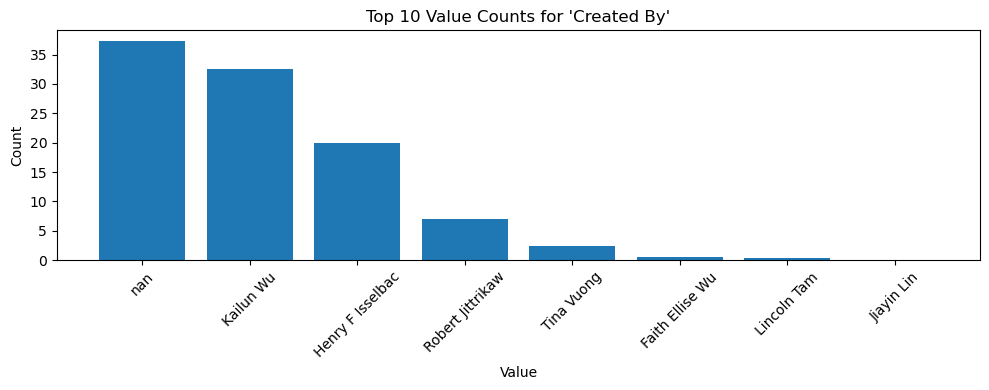


Value Counts for col 'From Request - Account Name'
From Request - Account Name
NaN                                                         43.71
3-60-204844-RHACO-RHA Leadership-Residence Hall Assembly     1.00
3-70-203436-00000-MISC-CB                                    0.81
3-71-100320-00000-TEMPREST-GSF                               0.77
3-40-201032-00000-ASUCFunds-ESC                              0.73
                                                            ...  
3-41-200488-00000-CONTIN-BP                                  0.00
3-40-205552-00000-ASUCFunds-BEAB                             0.00
3-70-200600-00000-MISC-CAA                                   0.00
3-30-100160-BANQT-ASUC ADMIN                                 0.00
3-70-204900-00000-MISC-Blockeley                             0.00
Name: count, Length: 1010, dtype: float64


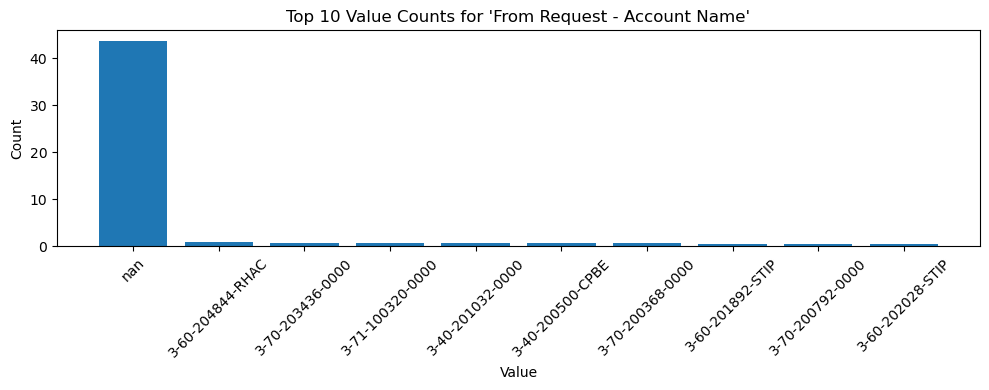


Value Counts for col 'Request Number'
Request Number
NaN          43.71
1822385.0     0.03
1822108.0     0.02
1836277.0     0.02
1833450.0     0.02
             ...  
1842727.0     0.00
1840750.0     0.00
1838679.0     0.00
1838961.0     0.00
1822099.0     0.00
Name: count, Length: 14477, dtype: float64


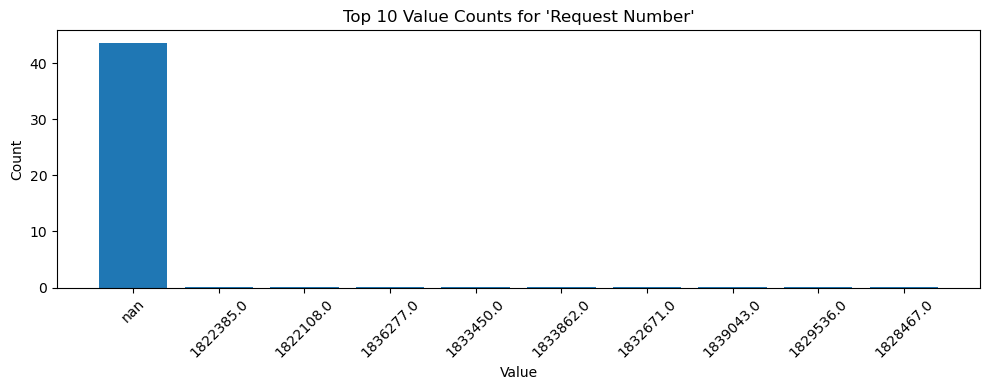


Value Counts for col 'From Request - Subject'
From Request - Subject
NaN                                                   43.71
SOF                                                    0.23
Team Dinner                                            0.09
TMC Fa24 Tutor Travel                                  0.09
TMC Sp25 Tutor Travel                                  0.08
                                                      ...  
18th NCPPS Gifts Purchase                              0.00
BSHA Period Products Drive (1 of 2)                    0.00
DC Trip Meals                                          0.00
2025 ASUC EAVP Banquet Dinner                          0.00
[QACON/Cal Q&A] Memorabilia for Conference Members     0.00
Name: count, Length: 12963, dtype: float64


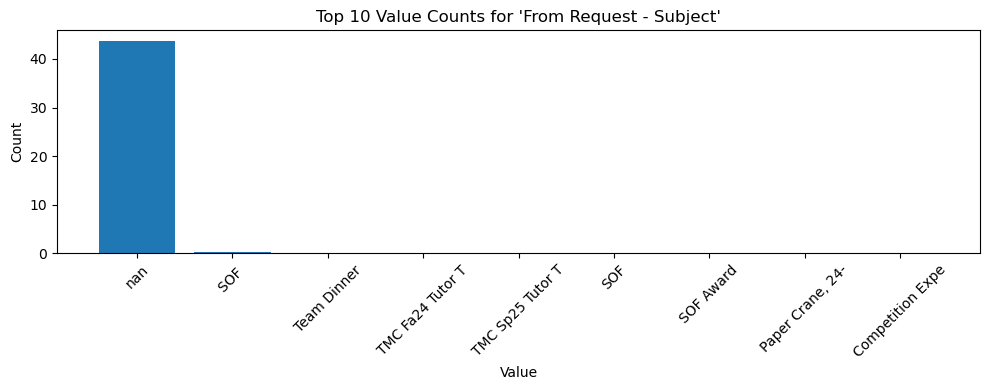


Value Counts for col 'From Request - Payee First Name'
From Request - Payee First Name
NaN                                  45.12
ASUC Student Union Event Services     0.71
Rachel                                0.27
Megan                                 0.25
Dylan                                 0.24
                                     ...  
Various                               0.00
Heer Collection Inc.                  0.00
Etsy                                  0.00
Pizza                                 0.00
Tran                                  0.00
Name: count, Length: 3759, dtype: float64


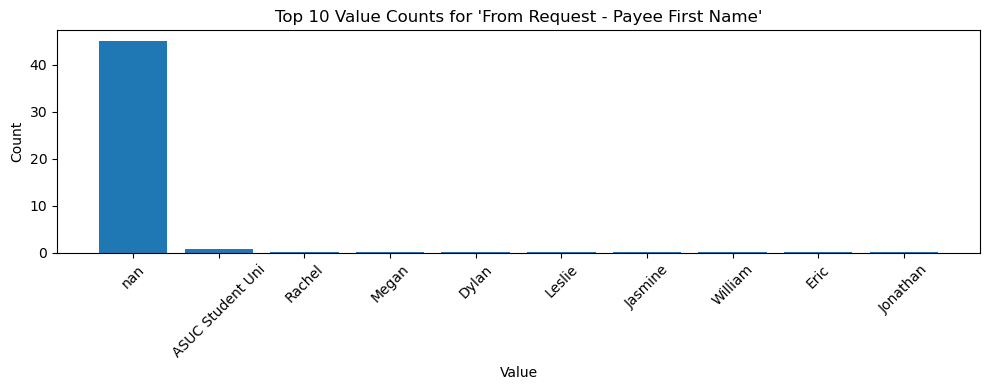


Value Counts for col 'From Request - Payee Last Name'
From Request - Payee Last Name
NaN                       47.34
Nguyen                     0.90
Chen                       0.64
Zhang                      0.56
Kim                        0.52
                          ...  
Terbijhe                   0.00
Prime                      0.00
Printing                   0.00
Adelina Romero Mireles     0.00
Vazhaeparambil             0.00
Name: count, Length: 3454, dtype: float64


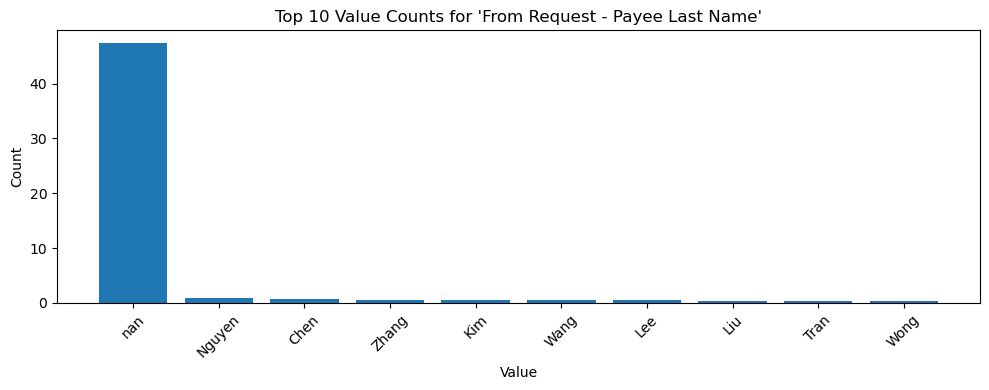


Value Counts for col 'From Request - Payee Address1'
From Request - Payee Address1
NaN                            46.28
2465 Bancroft Way – MC 4500     0.55
2424 Channing Way               0.25
2465 Bancroft Way               0.23
2424 Haste St                   0.21
                               ...  
2394 Mariner Square Drive       0.00
1419 MLK Jr Way                 0.00
2511 Durant Ave                 0.00
1821 Solano Ave                 0.00
12833 Wynant Drive              0.00
Name: count, Length: 5962, dtype: float64


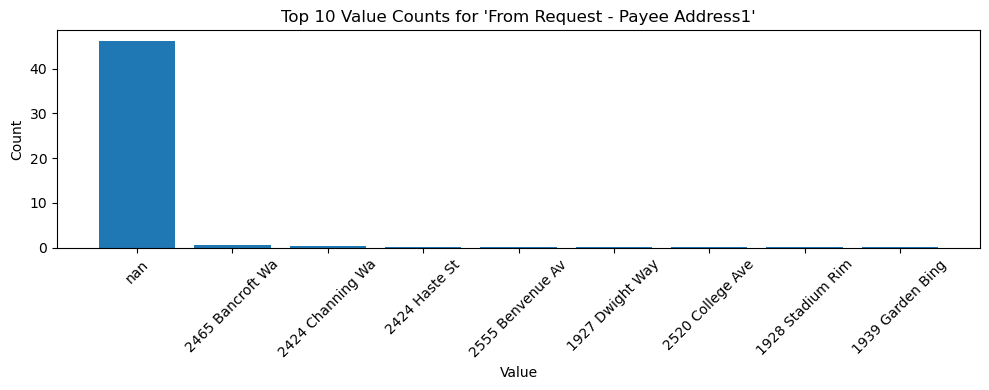


Value Counts for col 'From Request - Payee Address2'
From Request - Payee Address2
NaN          85.21
Apt 3         0.32
Apt 1         0.30
Apt A         0.23
Unit B        0.19
             ...  
10C           0.00
Box 10144     0.00
Room 3332     0.00
#26           0.00
8             0.00
Name: count, Length: 1187, dtype: float64


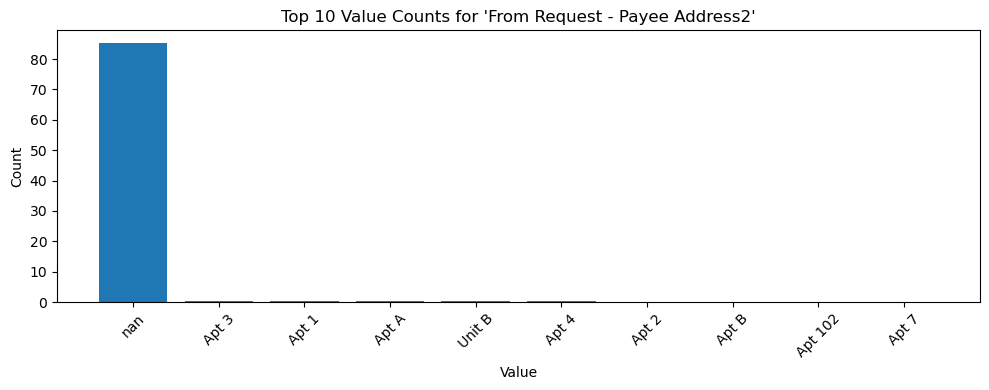


Value Counts for col 'From Request - Payee City'
From Request - Payee City
NaN                      46.32
Berkeley                 27.52
San Jose                  1.64
Oakland                   1.05
San Francisco             1.01
                         ...  
Bellflower                0.00
Riverbank                 0.00
West Windsor Township     0.00
,Rancho Cucamonga,        0.00
Granada Hills             0.00
Name: count, Length: 949, dtype: float64


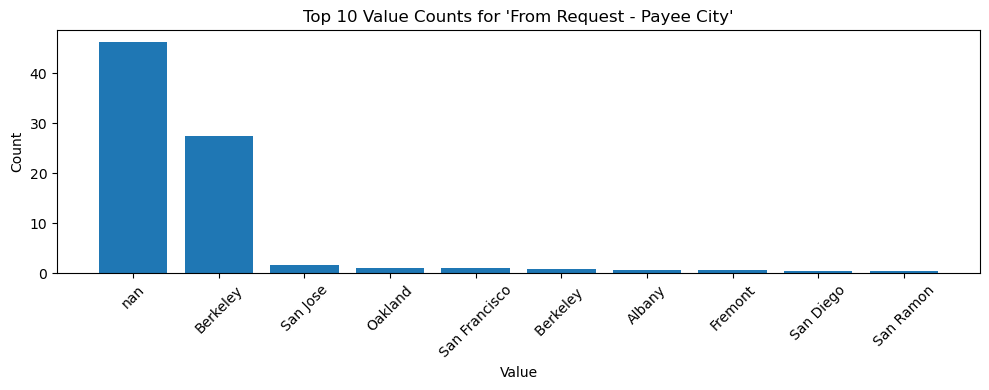


Value Counts for col 'From Request - Payee State'
From Request - Payee State
CA             49.75
NaN            46.39
Ca              0.72
NJ              0.25
TX              0.25
               ...  
Maryland        0.00
California.     0.00
md              0.00
BC              0.00
ID              0.00
Name: count, Length: 85, dtype: float64


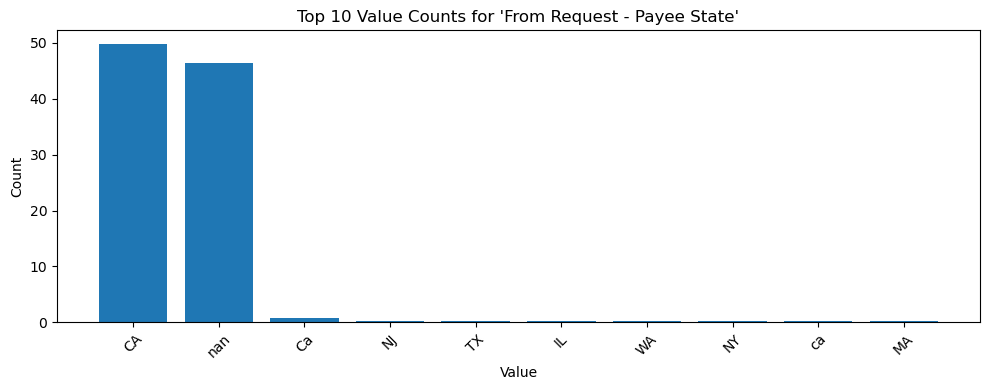


Value Counts for col 'From Request - Payee ZIP'
From Request - Payee ZIP
NaN           46.36
94704         18.78
94720          3.28
94709          2.99
94705          1.04
              ...  
14051          0.00
19171-9439     0.00
18154          0.00
6074           0.00
92841          0.00
Name: count, Length: 1206, dtype: float64


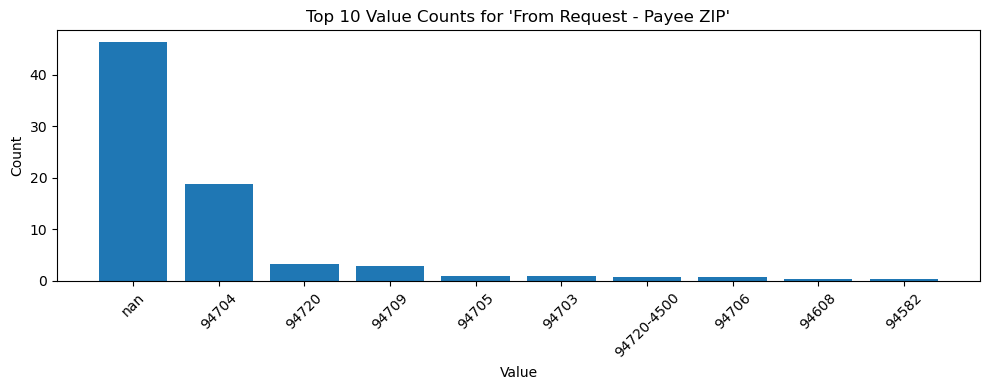

In [40]:
values_visualizer(raw, drop_cols)

In [32]:
keep_cols = [c for c in raw.columns if c not in set(drop_cols)]
keep_cols

['Account Name',
 'Account Description',
 'Transaction Reference #',
 'Date',
 'Reconciled',
 'Payee/Source First Name',
 'Payee/Source Last Name',
 'Originator Account Name',
 'Memo',
 'Category',
 'Type',
 'Transaction Method',
 'Amount',
 'Ending Balance After',
 'Available Balance After']


Value Counts for col 'Account Name'
Account Name
* ASUC UNDERGRADUATE FUNDS    100.0
Name: count, dtype: float64


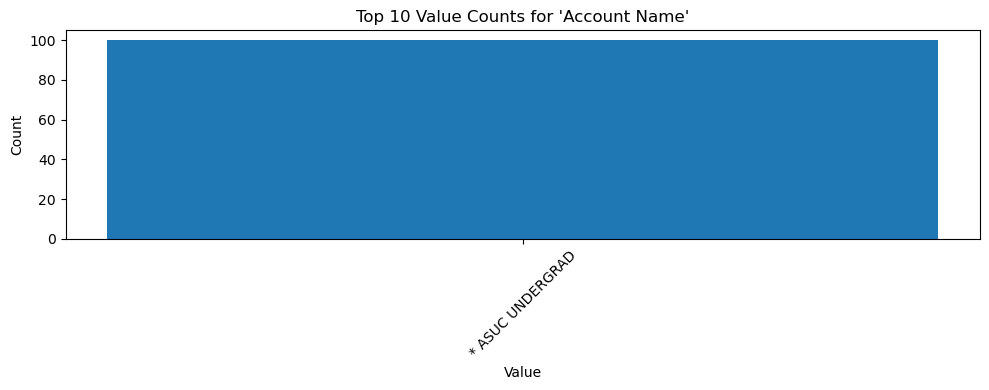


Value Counts for col 'Account Description'
Account Description
Parent account for all UNDERGRADUATE Activity    100.0
Name: count, dtype: float64


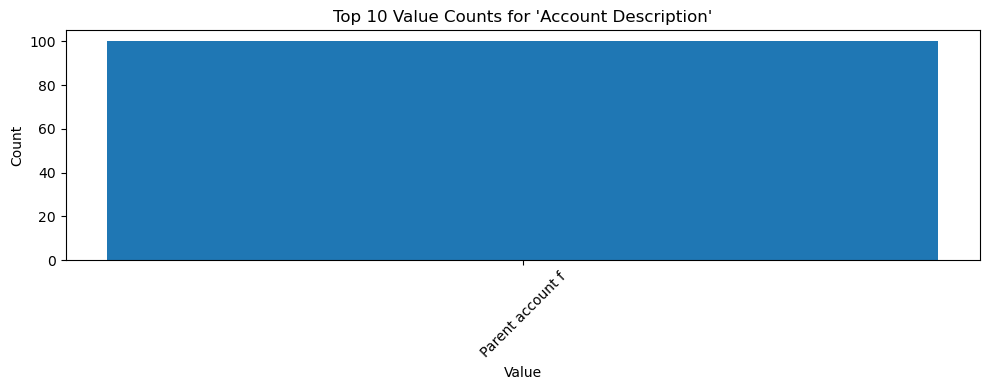


Value Counts for col 'Transaction Reference #'
Transaction Reference #
1880763    0.02
1880766    0.02
1881337    0.02
1865180    0.02
1889053    0.02
           ... 
1890049    0.00
1890050    0.00
1890051    0.00
1890052    0.00
1859020    0.00
Name: count, Length: 21114, dtype: float64


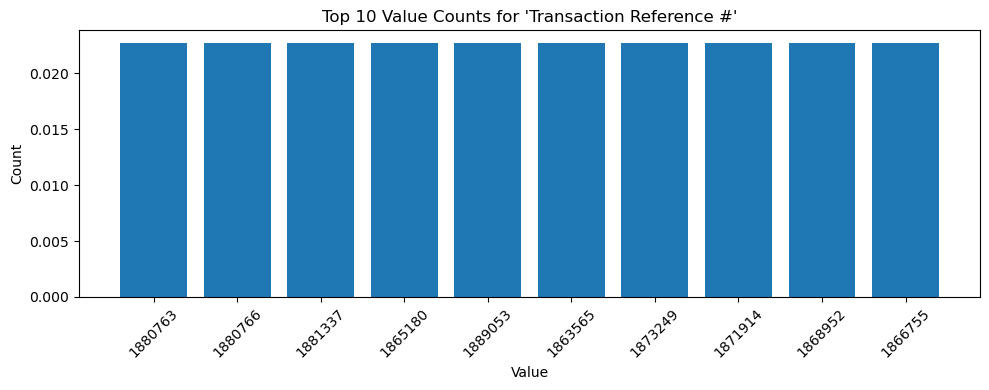


Value Counts for col 'Date'
Date
7/29/2024     11.75
12/25/2024     4.32
5/15/2025      4.19
7/27/2024      3.63
6/21/2025      3.30
              ...  
1/31/2025      0.00
3/28/2025      0.00
7/3/2025       0.00
7/14/2025      0.00
7/22/2025      0.00
Name: count, Length: 226, dtype: float64


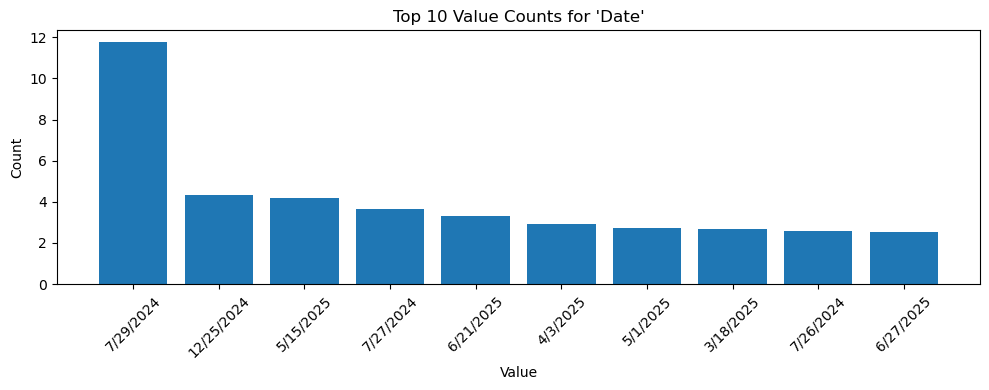


Value Counts for col 'Reconciled'
Reconciled
No    100.0
Name: count, dtype: float64


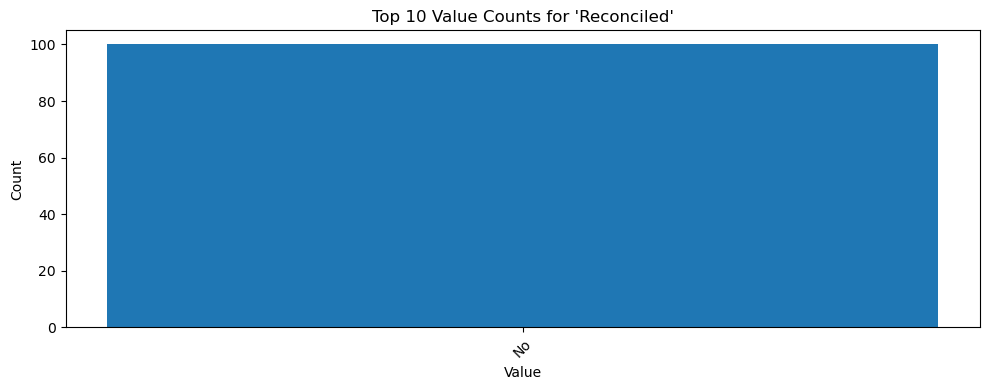


Value Counts for col 'Payee/Source First Name'
Payee/Source First Name
Henry Isselbacher                       21.30
Robert Jittrikawiphol                   15.96
NaN                                      2.26
Robert                                   1.08
ASUC Student Union Event Services        0.71
                                        ...  
Chica Locca Tours                        0.00
Suchi                                    0.00
Mint Leaf Vietnamese Restaurant          0.00
Seema Shanti                             0.00
 Drury Plaza Hotel St. Paul Downtown     0.00
Name: count, Length: 4082, dtype: float64


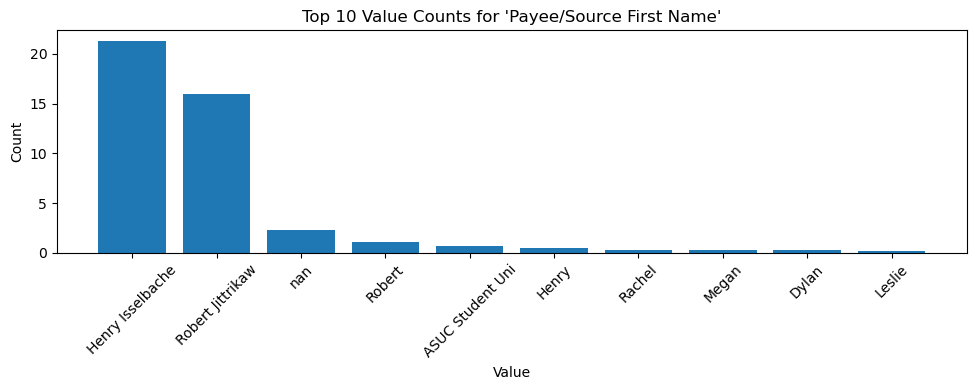


Value Counts for col 'Payee/Source Last Name'
Payee/Source Last Name
NaN                       46.56
Jittrikawiphol             1.01
Nguyen                     0.90
Chen                       0.64
Zhang                      0.56
                          ...  
EVENTS                     0.00
Burrita                    0.00
Monreal                    0.00
Vazhaeparambil             0.00
Adelina Romero Mireles     0.00
Name: count, Length: 3431, dtype: float64


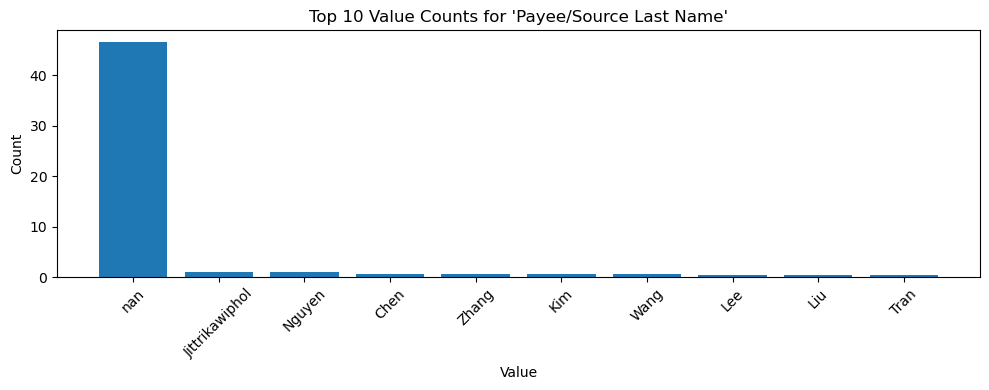


Value Counts for col 'Originator Account Name'
Originator Account Name
3-70-200792-00000-MISC-CEEJFC                               1.93
3-40-100220-00000-ASUCFunds-SCF                             1.54
3-70-100152-BBIZR-MISC-SO                                   1.23
3-70-202668-IMISC-B&G-Misc-DEPOSITS                         1.17
3-60-204844-RHACO-RHA Leadership-Residence Hall Assembly    1.14
                                                            ... 
3-40-202500-00000-ASUCFunds-UGCC                            0.00
3-40-201648-00000-ASUCFunds-mcbUSA                          0.00
3-40-201544-00000-ASUCFunds-Riot Games                      0.00
3-40-201504-00000-ASUCFunds-LTPLF                           0.00
3-40-200136-00000-ASUCFunds-AfgSA                           0.00
Name: count, Length: 1994, dtype: float64


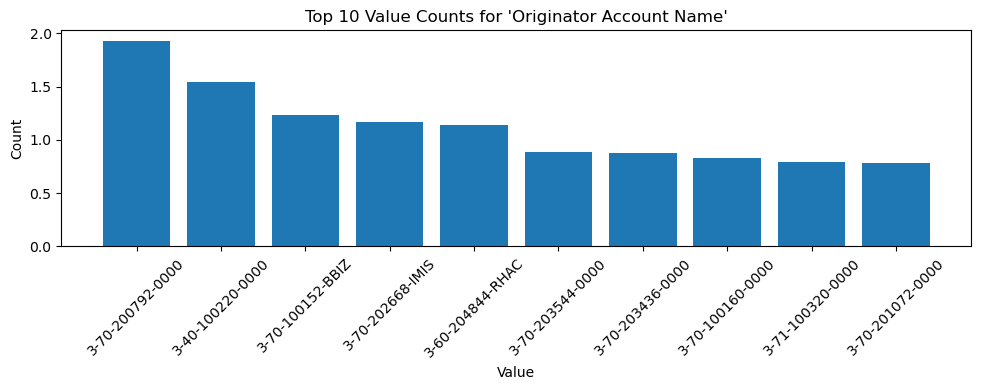


Value Counts for col 'Memo'
Memo
Fiscal Year 23-24 Carry Forward Balance          8.39
Reversal of Year End 23-24 Balance               6.22
Allocation of FY 2024-2025 Budget                3.09
Give to Cal/Big Give March 2025                  1.23
April Credit Card 2025                           0.78
                                                 ... 
CL#1836221, completed, April Credit Card 2025    0.00
no CL, April Credit Card 2025                    0.00
no PR, April Credit Card 2025                    0.00
no PR, May Credit Card 2025                      0.00
UCEFT29910 05/28/25 KW                           0.00
Name: count, Length: 14184, dtype: float64


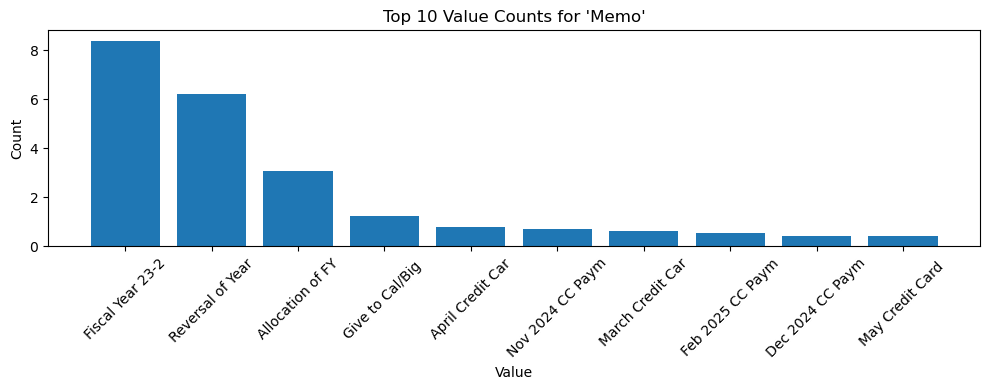


Value Counts for col 'Category'
Category
Reimbursement                                                        38.60
Deposit                                                              20.25
Internal Transfer                                                    18.17
Stipend                                                               6.16
ASUC Credit Card Purchase                                             5.90
Transfer between Accounts                                             3.90
Payment to Vendor                                                     2.17
Awards                                                                1.54
X-Adjustment (Admin use only)                                         1.12
Contracted Service                                                    1.03
ASUC Instant Card Purchase (mobile temp-use card)                     0.57
NaN                                                                   0.46
Bank Transfer (Admin use only)                            

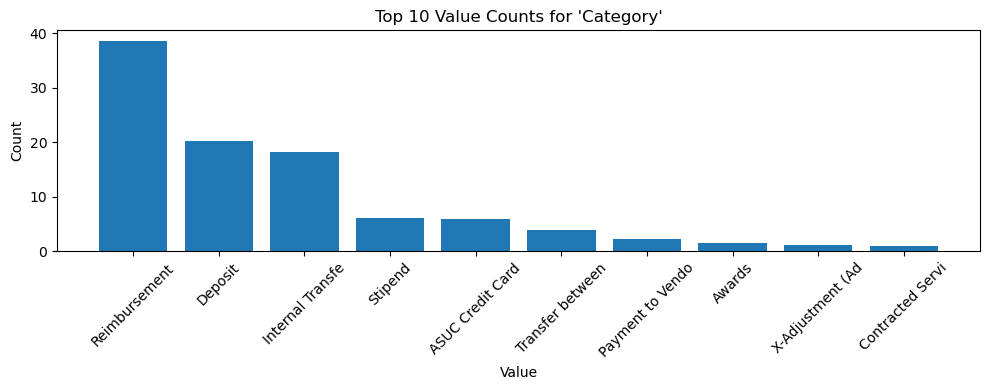


Value Counts for col 'Type'
Type
Direct Deposit ACH/Stripe                   28.90
Internal Allocation/Transaction/Transfer    22.33
Internal Transfer                           16.39
Payment                                     15.20
Check                                        7.53
NaN                                          5.63
Cash/Check Deposit                           2.49
Credit Card Payment                          1.53
Campus Support                               0.01
Name: count, dtype: float64


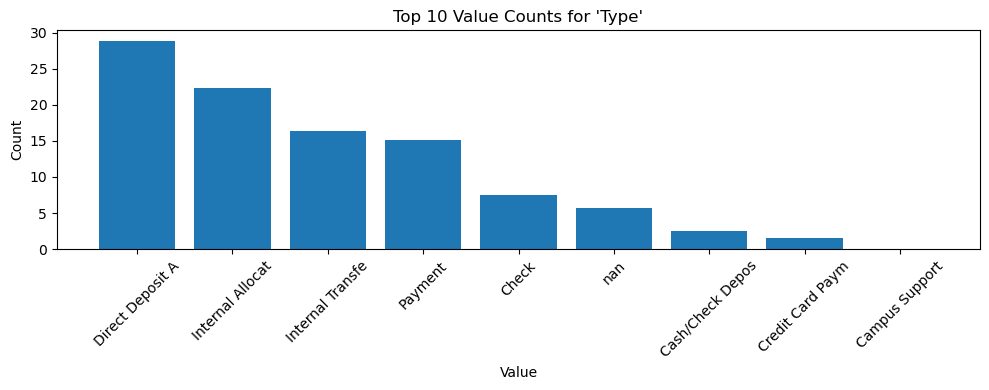


Value Counts for col 'Transaction Method'
Transaction Method
Payment       63.79
Deposit       18.10
Allocation    18.10
Name: count, dtype: float64


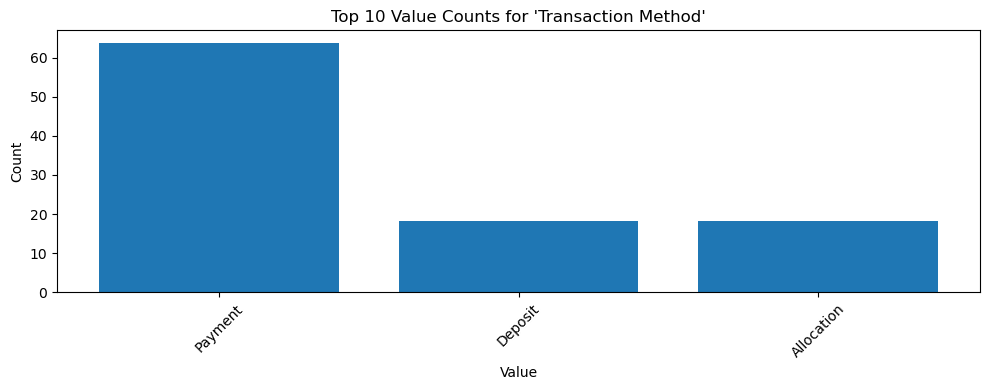


Value Counts for col 'Amount'
Amount
$300.00      3.35
$500.00      1.90
$1,000.00    1.34
$1.64        1.22
$2,000.00    0.79
             ... 
$671.42      0.00
$308.71      0.00
$39.86       0.00
$1,060.14    0.00
$334.74      0.00
Name: count, Length: 11957, dtype: float64


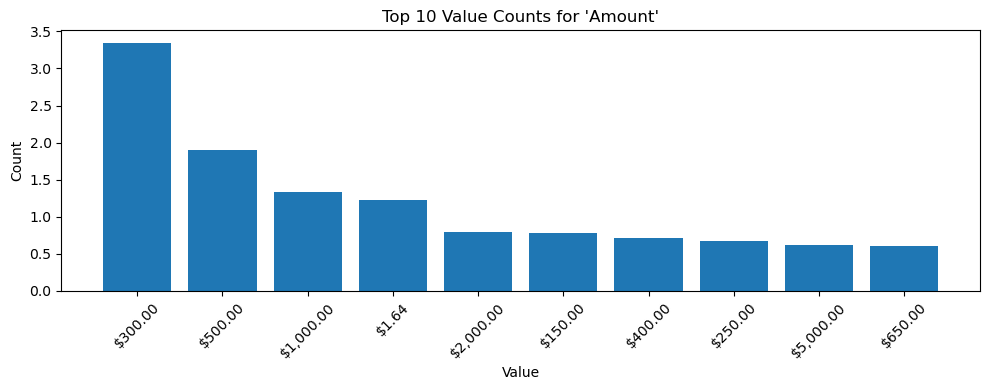


Value Counts for col 'Ending Balance After'
Ending Balance After
$10,116,661.59    0.09
$9,587,149.35     0.07
$10,277,060.35    0.06
$11,196,900.13    0.06
$11,818,143.34    0.05
                  ... 
$7,487,435.88     0.00
$7,487,744.59     0.00
$7,487,757.58     0.00
$7,169,442.23     0.00
$7,172,764.48     0.00
Name: count, Length: 21135, dtype: float64


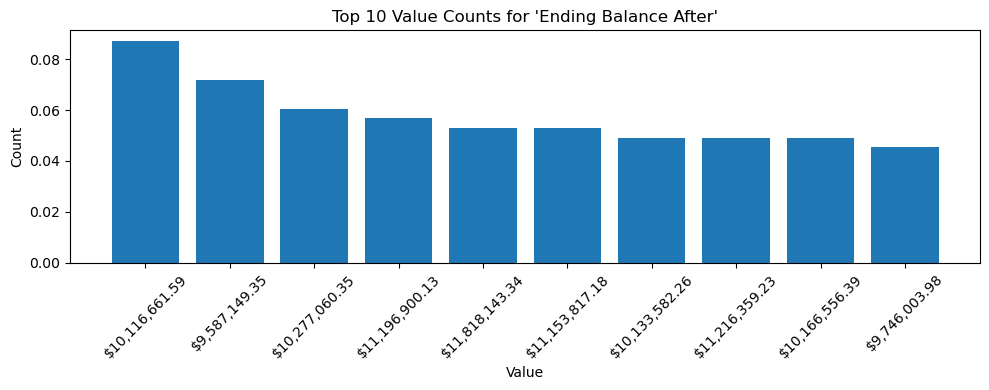


Value Counts for col 'Available Balance After'
Available Balance After
$0.00        81.90
$1.64         0.61
$500.00       0.52
$1,000.00     0.44
$2,000.00     0.29
             ...  
$3,334.87     0.00
$277.47       0.00
$1,228.61     0.00
$102.58       0.00
$1,547.00     0.00
Name: count, Length: 2229, dtype: float64


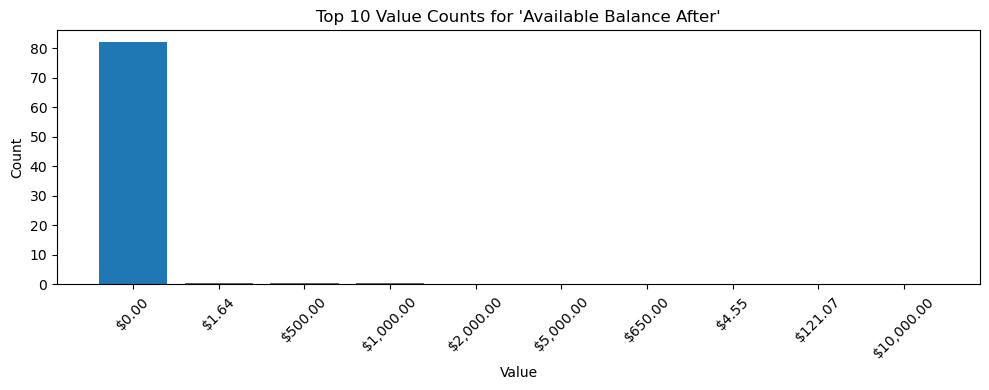

In [41]:
values_visualizer(raw, keep_cols)

### Cleaning Out Values

In [43]:
def parse_dollar(val):
    if isinstance(val, str):
        # Remove $ and commas, then convert
        val = val.replace('$', '').replace(',', '')
    try:
        return float(val)
    except (ValueError, TypeError):
        return None  # or np.nan

tbl = raw[keep_cols].copy()
dollar_cols = ['Amount', 'Available Balance After', 'Ending Balance After']
for col in dollar_cols:
    tbl[col] = tbl[col].apply(parse_dollar)

In [ ]:
tbl['Reconciled'].apply(lambda x: False if x.lower() == 'no' else True)

0        0
1        0
2        0
3        0
4        0
        ..
26404    0
26405    0
26406    0
26407    0
26408    0
Name: Reconciled, Length: 26409, dtype: int64

In [54]:
str_cols = ['Account Name', 'Account Description', 'Payee/Source First Name', 'Payee/Source Last Name',	'Originator Account Name', 'Memo', 'Category', 'Type', 'Transaction Method']
bool_cols = ['Reconciled']
int_cols = ['Transaction Reference #']
float_cols = ['Amount',	'Ending Balance After',	'Available Balance After']
date_cols = ['Date']
tbl = column_converter(tbl, cols=str_cols, t=str)
tbl = column_converter(tbl, cols=bool_cols, t=bool)
tbl = column_converter(tbl, cols=int_cols, t=int)
tbl = column_converter(tbl, cols=float_cols, t=float)
tbl = column_converter(tbl, cols=date_cols, t=pd.Timestamp)

In [47]:
tbl.dtypes

Account Name                       object
Account Description                object
Transaction Reference #             int64
Date                       datetime64[ns]
Reconciled                           bool
Payee/Source First Name            object
Payee/Source Last Name             object
Originator Account Name            object
Memo                               object
Category                           object
Type                               object
Transaction Method                 object
Amount                            float64
Ending Balance After              float64
Available Balance After           float64
dtype: object

## Examining Total Dollar Amount of Transactions

In [50]:
tbl['Category'].value_counts()

Category
Reimbursement                                                        10195
Deposit                                                               5349
Internal Transfer                                                     4798
Stipend                                                               1627
ASUC Credit Card Purchase                                             1557
Transfer between Accounts                                             1031
Payment to Vendor                                                      572
Awards                                                                 406
X-Adjustment (Admin use only)                                          295
Contracted Service                                                     271
ASUC Instant Card Purchase (mobile temp-use card)                      150
nan                                                                    122
Bank Transfer (Admin use only)                                          13
Transfer        

In [ ]:
def not_admin(entry: str):
    ENTRY = entry.lower().strip()
    if 'admin' in ENTRY:
        return False
    elif 'internal transfer' in ENTRY or 'transfer between accounts' in ENTRY:
        return False
    else:
        return True

In [57]:
def admin(entry: str):
   return not not_admin(entry)

In [ ]:
def m_relevance(entry: str):
    # SGPA Advisor Mickael said these are the relevant categories to keep track of
    KEY = set(['credit card', 'reimbursement', 'stipend', 'payment to vendor', 'contracted service'])
    ENTRY = entry.lower().strip()
    return ENTRY in KEY

In [53]:
amount_sum = tbl[tbl['Category'].apply(not_admin)]
sum(amount_sum['Amount'])

28220909.95000029

In [60]:
mickael_sum = tbl[tbl['Category'].apply(m_relevance)]
sum(mickael_sum['Amount'])

7790819.23000001

### Labelling Admin and Category Transaction Relevancy

In [61]:
tbl['Admin'] = tbl['Category'].apply(admin)
tbl['M Relevance'] = tbl['Category'].apply(m_relevance)

In [63]:
tbl.head(5)

,Account Name,Account Description,Transaction Reference #,Date,Reconciled,Payee/Source First Name,Payee/Source Last Name,Originator Account Name,Memo,Category,Type,Transaction Method,Amount,Ending Balance After,Available Balance After,Admin,M Relevance
0,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1859011,2024-07-26,True,Henry Isselbacher,nan,3-40-201492-00000-ASUCFunds-LCP,Reversal of Year End 23-24 Balance,Internal Transfer,Direct Deposit ACH/Stripe,Payment,1097.34,7188947.99,0.0,True,False
1,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1859012,2024-07-26,True,Henry Isselbacher,nan,3-40-200124-00000-ASUCFunds-Abba,Reversal of Year End 23-24 Balance,Internal Transfer,Direct Deposit ACH/Stripe,Payment,320.00,7188627.99,0.0,True,False
2,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1859013,2024-07-26,True,Henry Isselbacher,nan,3-40-200132-00000-ASUCFunds-A2F,Reversal of Year End 23-24 Balance,Internal Transfer,Direct Deposit ACH/Stripe,Payment,666.06,7187961.93,0.0,True,False
3,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1859014,2024-07-26,True,Henry Isselbacher,nan,3-40-200136-00000-ASUCFunds-AfgSA,Reversal of Year End 23-24 Balance,Internal Transfer,Direct Deposit ACH/Stripe,Payment,3971.50,7183990.43,0.0,True,False
4,* ASUC UNDERGRADUATE FUNDS,Parent account for all UNDERGRADUATE Activity,1859015,2024-07-26,True,Henry Isselbacher,nan,3-40-201496-00000-ASUCFunds-LTALS,Reversal of Year End 23-24 Balance,Internal Transfer,Direct Deposit ACH/Stripe,Payment,361.96,7183628.47,0.0,True,False


## Checking Account Types

In [65]:
def account_interpreter(entry: str):
    ENTRY = entry.lower().strip()
    if 'asucfunds' in ENTRY:
        return 'ASUC'
    elif 'misc' in ENTRY:
        return 'MISC'
    elif 'summary' in ENTRY:
        return 'SUMMARY'
    else:
        return 'UNKOWN'

In [ ]:
tbl['Account Type'] = tbl['Originator Account Name'].apply(account_interpreter)


Value Counts for col 'Account Type'
Account Type
MISC      64.55
UNKOWN    19.38
ASUC      16.07
Name: count, dtype: float64


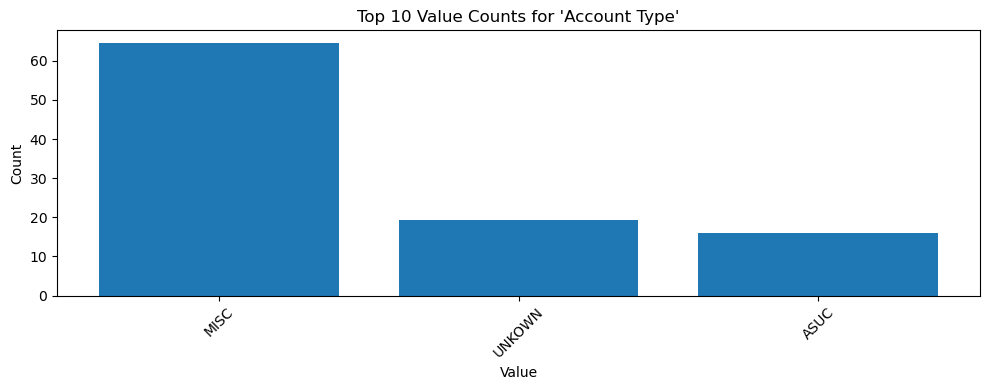

In [70]:
values_visualizer(tbl, 'Account Type')